# Máster en Python Avanzado por Asociación AEPI

## Módulo XI - Programación Científica

### Enunciado del problema

En esta competición vuestra tarea es la de predecir cuando un pasajero ha sido transportado a otra dimensión, durante el impacto de la nave espacial Titanic con una anomalía del espacio tiempo.

Para ayudaros con la predicción, tienes acceso a los registros de personas recuperados del ordenador de abordo.

### Descripción conjunto de datos

* PassengerId - Un identificador único por cada pasajero. Tiene la forma gggg_pp donde gggg indica el grupo con el que está viajando y pp su número dentro del grupo. Los miembros de un grupo suelen ser familiares, pero no siempre.
* HomePlanet - El planeta donde embarcó el pasajero.
* CryoSleep - Indica si el pasajero eligió pausar sus constantes vitales durante el viaje. En este caso viajaba confinado en su cabina.
* Cabin - El número de la cabina. Tiene la forma Puente/Número/Lado.
* Destination - El planeta de desembarque.
* Age - La edad del pasajero.
* VIP - Si el pasajero ha pagado por servicios VIP dentro del viaje.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Cantidad de dinero que ha gastado en las facilidades de la nave espacial.
* Name - Nombre y apellido del pasajero.
* Transported - Si finalmente, el pasajero fue trasportado a otra dimensión. Este es el valor que tenemos que predecir.



In [257]:
#%pip install matplotlib seaborn pandas numpy

In [258]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


# pip install matplotlib seaborn pandas numpy

In [259]:
train_df = pd.read_csv("train.csv")

In [260]:
train_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [261]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [262]:
train_df.shape

(8693, 14)

In [263]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [264]:
train_df.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [265]:
train_df.Destination.unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [266]:
train_df.Destination.describe()


count            8511
unique              3
top       TRAPPIST-1e
freq             5915
Name: Destination, dtype: object

In [267]:
train_df.Destination.unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [268]:
mapper = {"TRAPPIST-1e": 0, "PSO J318.5-22": 1, "55 Cancri e":2}

train_df.Destination = train_df.Destination.map(mapper)

In [269]:
np.random.seed(10)
substitutions = np.random.randint(0, 3, size=train_df.Destination.isnull().sum())
train_df.Destination[np.isnan(train_df.Destination)] = substitutions

C:\Users\ManuBenito\AppData\Local\Temp\ipykernel_21168\2649192209.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.Destination[np.isnan(train_df.Destination)] = substitutions


In [270]:
train_df.Destination = train_df.Destination.astype(int)

In [271]:
train_df.info()# rellenar los NaN values de la columna HomePlanet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8693 non-null   int32  
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), int32(1), object(6)
memory usage: 857.5+ KB


In [272]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,0,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,0,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,0,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [273]:
train_df.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [274]:
train_df['HomePlanet'].fillna('Neptune', inplace=True)

In [275]:
train_df.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', 'Neptune'], dtype=object)

In [276]:
train_df.HomePlanet = train_df.HomePlanet.map({"Europa":0, "Earth": 1, "Mars": 2, "Neptune": 3})


In [277]:
train_df.HomePlanet.info()

<class 'pandas.core.series.Series'>
RangeIndex: 8693 entries, 0 to 8692
Series name: HomePlanet
Non-Null Count  Dtype
--------------  -----
8693 non-null   int64
dtypes: int64(1)
memory usage: 68.0 KB


In [278]:
train_df.groupby("CryoSleep")[["Spa", "VRDeck", "FoodCourt", "ShoppingMall", "RoomService"]].mean()

,Spa,VRDeck,FoodCourt,ShoppingMall,RoomService
CryoSleep,,,,,
False,486.09294,475.716165,713.004316,270.586504,350.146772
True,0.00000,0.000000,0.000000,0.000000,0.000000


In [279]:
for column in ["Spa", "VRDeck", "FoodCourt", "ShoppingMall", "RoomService"]:
    train_df[column].fillna(train_df[train_df["CryoSleep"]==False][column].mean(), inplace=True)
    train_df[column] = train_df[column].astype(int)




In [280]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   int64  
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8693 non-null   int32  
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8693 non-null   int32  
 8   FoodCourt     8693 non-null   int32  
 9   ShoppingMall  8693 non-null   int32  
 10  Spa           8693 non-null   int32  
 11  VRDeck        8693 non-null   int32  
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(1), int32(6), int64(1), object(5)
memory usage: 687.8+ KB


In [281]:
train_df.groupby("CryoSleep")[["Spa", "VRDeck", "FoodCourt", "ShoppingMall", "RoomService"]].mean()

,Spa,VRDeck,FoodCourt,ShoppingMall,RoomService
CryoSleep,,,,,
False,486.091009,475.700496,713.004229,270.575290,350.143776
True,10.401712,9.697069,16.433981,8.534738,7.836681


In [282]:
train_df.Spa.info()

<class 'pandas.core.series.Series'>
RangeIndex: 8693 entries, 0 to 8692
Series name: Spa
Non-Null Count  Dtype
--------------  -----
8693 non-null   int32
dtypes: int32(1)
memory usage: 34.1 KB


In [283]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   int64  
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8693 non-null   int32  
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8693 non-null   int32  
 8   FoodCourt     8693 non-null   int32  
 9   ShoppingMall  8693 non-null   int32  
 10  Spa           8693 non-null   int32  
 11  VRDeck        8693 non-null   int32  
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(1), int32(6), int64(1), object(5)
memory usage: 687.8+ KB


In [284]:
train_df.CryoSleep.fillna(pd.Series(np.where(train_df[["Spa", "VRDeck", "FoodCourt", "ShoppingMall", "RoomService"]].eq(0).all(1, skipna=True), True, False)), inplace=True)


In [285]:
train_df.CryoSleep.info()

<class 'pandas.core.series.Series'>
RangeIndex: 8693 entries, 0 to 8692
Series name: CryoSleep
Non-Null Count  Dtype
--------------  -----
8693 non-null   bool 
dtypes: bool(1)
memory usage: 8.6 KB


In [286]:
train_df.groupby("CryoSleep")[["Spa", "VRDeck", "FoodCourt", "ShoppingMall", "RoomService"]].mean()

,Spa,VRDeck,FoodCourt,ShoppingMall,RoomService
CryoSleep,,,,,
False,485.749506,476.322500,714.456096,270.126055,350.528102
True,10.112036,9.427017,15.976312,8.297055,7.618438


In [287]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   int64  
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8494 non-null   object 
 4   Destination   8693 non-null   int32  
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8693 non-null   int32  
 8   FoodCourt     8693 non-null   int32  
 9   ShoppingMall  8693 non-null   int32  
 10  Spa           8693 non-null   int32  
 11  VRDeck        8693 non-null   int32  
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(2), float64(1), int32(6), int64(1), object(4)
memory usage: 628.3+ KB


In [288]:
train_df.Age.fillna(train_df.Age.mean(), inplace=True)

In [289]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   int64  
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8494 non-null   object 
 4   Destination   8693 non-null   int32  
 5   Age           8693 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8693 non-null   int32  
 8   FoodCourt     8693 non-null   int32  
 9   ShoppingMall  8693 non-null   int32  
 10  Spa           8693 non-null   int32  
 11  VRDeck        8693 non-null   int32  
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(2), float64(1), int32(6), int64(1), object(4)
memory usage: 628.3+ KB


In [290]:
#revisar luego para mejorar margen de error
train_df.VIP.fillna(False, inplace=True)


In [291]:
train_df["Deck"] = train_df.Cabin.str.split("/").str[0]
train_df["Room"] = train_df.Cabin.str.split("/").str[1]
train_df["Side"] = train_df.Cabin.str.split("/").str[2]

In [292]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Room,Side
0,0001_01,0,False,B/0/P,0,39.0,False,0,0,0,0,0,Maham Ofracculy,False,B,0,P
1,0002_01,1,False,F/0/S,0,24.0,False,109,9,25,549,44,Juanna Vines,True,F,0,S
2,0003_01,0,False,A/0/S,0,58.0,True,43,3576,0,6715,49,Altark Susent,False,A,0,S
3,0003_02,0,False,A/0/S,0,33.0,False,0,1283,371,3329,193,Solam Susent,False,A,0,S
4,0004_01,1,False,F/1/S,0,16.0,False,303,70,151,565,2,Willy Santantines,True,F,1,S


In [293]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   int64  
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8494 non-null   object 
 4   Destination   8693 non-null   int32  
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   int32  
 8   FoodCourt     8693 non-null   int32  
 9   ShoppingMall  8693 non-null   int32  
 10  Spa           8693 non-null   int32  
 11  VRDeck        8693 non-null   int32  
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Deck          8494 non-null   object 
 15  Room          8494 non-null   object 
 16  Side          8494 non-null   object 
dtypes: bool(3), float64(1), int32(6), int64(1), object(6)
memory usage: 772

In [294]:
train_df.Deck.fillna("T", inplace=True)

In [295]:
train_df.Deck = train_df.Deck.map({value: idx for idx, value in enumerate(train_df.Deck.unique())})

In [296]:
train_df.Deck.unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [297]:
train_df.Room.unique()

array(['0', '1', '2', ..., '1892', '1893', '1894'], dtype=object)

In [298]:
train_df.Room.fillna("947", inplace=True)

In [299]:
train_df.Room = train_df.Room.astype(np.int)

C:\Users\ManuBenito\AppData\Local\Temp\ipykernel_21168\456286870.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_df.Room = train_df.Room.astype(np.int)


In [300]:
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Room,Side
0,0001_01,0,False,B/0/P,0,39.0,False,0,0,0,0,0,Maham Ofracculy,False,0,0,P
1,0002_01,1,False,F/0/S,0,24.0,False,109,9,25,549,44,Juanna Vines,True,1,0,S
2,0003_01,0,False,A/0/S,0,58.0,True,43,3576,0,6715,49,Altark Susent,False,2,0,S
3,0003_02,0,False,A/0/S,0,33.0,False,0,1283,371,3329,193,Solam Susent,False,2,0,S
4,0004_01,1,False,F/1/S,0,16.0,False,303,70,151,565,2,Willy Santantines,True,1,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,False,A/98/P,2,41.0,True,0,6819,0,1643,74,Gravior Noxnuther,False,2,98,P
8689,9278_01,1,True,G/1499/S,1,18.0,False,0,0,0,0,0,Kurta Mondalley,False,3,1499,S
8690,9279_01,1,False,G/1500/S,0,26.0,False,0,0,1872,1,0,Fayey Connon,True,3,1500,S
8691,9280_01,0,False,E/608/S,2,32.0,False,0,1049,0,353,3235,Celeon Hontichre,False,5,608,S


In [301]:
train_df.Side.fillna("S", inplace=True)

In [302]:
train_df.Side = train_df.Side.map({value: idx for idx, value in enumerate(train_df.Side.unique())})

In [303]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   int64  
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8494 non-null   object 
 4   Destination   8693 non-null   int32  
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   int32  
 8   FoodCourt     8693 non-null   int32  
 9   ShoppingMall  8693 non-null   int32  
 10  Spa           8693 non-null   int32  
 11  VRDeck        8693 non-null   int32  
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Deck          8693 non-null   int64  
 15  Room          8693 non-null   int32  
 16  Side          8693 non-null   int64  
dtypes: bool(3), float64(1), int32(7), int64(3), object(3)
memory usage: 738

In [304]:
train_df = train_df.drop(["Cabin"], axis=1)

In [305]:
train_df = train_df.drop(["Name"], axis=1)

In [306]:
train_df.describe()

,HomePlanet,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Room,Side
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,1.003451,0.525825,28.827930,227.296791,463.443690,176.032670,314.819855,308.534453,2.792592,608.302772,0.516162
std,0.734864,0.822168,14.339054,659.981984,1594.854944,597.598591,1124.956005,1133.529303,2.091748,508.623033,0.499767
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,173.000000,0.000000
50%,1.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,448.000000,1.000000
75%,1.000000,1.000000,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000,4.000000,983.000000,1.000000
max,3.000000,2.000000,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,7.000000,1894.000000,1.000000


In [307]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   int64  
 2   CryoSleep     8693 non-null   bool   
 3   Destination   8693 non-null   int32  
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   bool   
 6   RoomService   8693 non-null   int32  
 7   FoodCourt     8693 non-null   int32  
 8   ShoppingMall  8693 non-null   int32  
 9   Spa           8693 non-null   int32  
 10  VRDeck        8693 non-null   int32  
 11  Transported   8693 non-null   bool   
 12  Deck          8693 non-null   int64  
 13  Room          8693 non-null   int32  
 14  Side          8693 non-null   int64  
dtypes: bool(3), float64(1), int32(7), int64(3), object(1)
memory usage: 602.9+ KB


In [308]:
train_df = train_df.drop(["PassengerId"], axis=1)

In [309]:
train_df.Age = train_df.Age.astype(int)

In [310]:
train_df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Room,Side
0,0,False,0,39,False,0,0,0,0,0,False,0,0,0
1,1,False,0,24,False,109,9,25,549,44,True,1,0,1
2,0,False,0,58,True,43,3576,0,6715,49,False,2,0,1
3,0,False,0,33,False,0,1283,371,3329,193,False,2,0,1
4,1,False,0,16,False,303,70,151,565,2,True,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,False,2,41,True,0,6819,0,1643,74,False,2,98,0
8689,1,True,1,18,False,0,0,0,0,0,False,3,1499,1
8690,1,False,0,26,False,0,0,1872,1,0,True,3,1500,1
8691,0,False,2,32,False,0,1049,0,353,3235,False,5,608,1


In [311]:
train_df['CryoSleep'] = train_df.CryoSleep.map({True:1,False:0})

<AxesSubplot:xlabel='CryoSleep', ylabel='Count'>

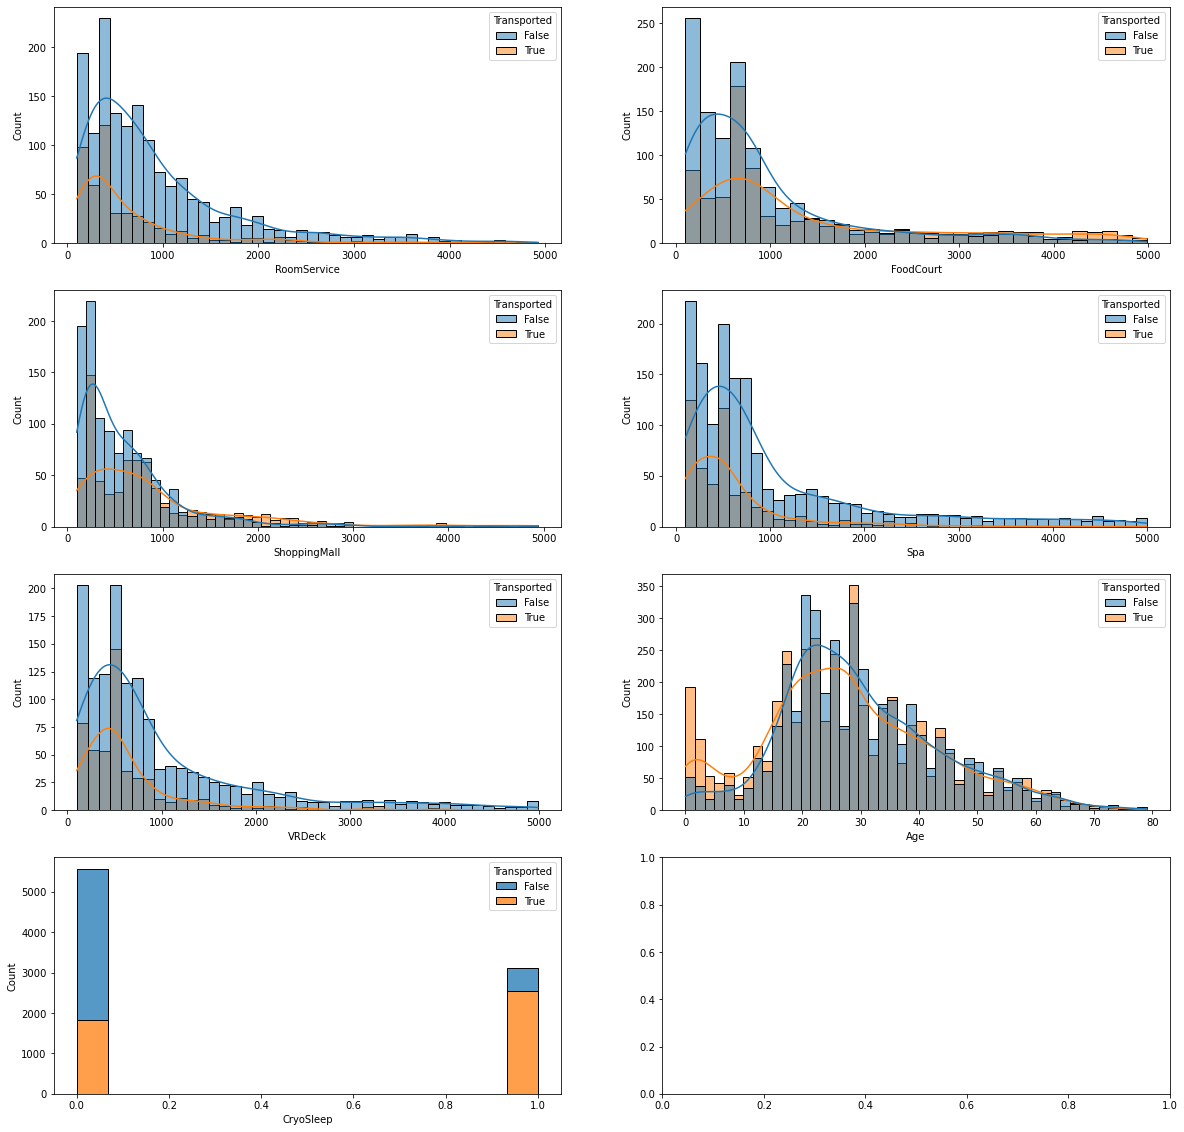

In [315]:

fig, ax = plt.subplots(4,2,figsize = (20,20))
cmap = sns.color_palette("vlag",as_cmap = True)
paletteColors = sns.color_palette("vlag",n_colors=6)

sns.histplot(data = train_df[train_df['RoomService'].between(100,5000)],
             x="RoomService",
             ax = ax[0,0],
             hue = "Transported",
             kde=True
             #multiple="stack"
             )

sns.histplot(data = train_df[train_df['FoodCourt'].between(100,5000)],
             x="FoodCourt",
             ax = ax[0,1],
             hue = "Transported",
             #multiple="stack",
             kde=True
             ),


sns.histplot(data = train_df[train_df['ShoppingMall'].between(100,5000)],
             x="ShoppingMall",
             ax = ax[1,0],
             hue = "Transported",
             #multiple="stack",
             kde=True)

sns.histplot(data = train_df[train_df['Spa'].between(100,5000)],
             x="Spa",
             ax = ax[1,1],
             hue = "Transported",
             #multiple="stack",
             kde=True)

sns.histplot(data = train_df[train_df['VRDeck'].between(100,5000)],
             x="VRDeck",
             ax = ax[2,0],
             hue = "Transported",
             #multiple="stack",
             kde=True)

sns.histplot(data = train_df,
             x="Age",
             ax = ax[2,1],
             hue = "Transported",
             #multiple="stack",
             kde=True)

sns.histplot(data = train_df,
             x="CryoSleep",
             ax = ax[3,0],
             hue = "Transported",
             multiple="stack",
             )



In [ ]:
Y = train_df["Transported"].copy()
train_df = train_df.drop(["Transported"], axis=1)
x_train, x_test, y_train, y_test  = train_test_split(train_df, Y, test_size=0.3)

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)


In [ ]:
rf_predictions = rf.predict(x_test)

In [ ]:
rf_predictions

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
accuracy_score(y_test, rf_predictions)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, rf_predictions).ravel()

In [ ]:
tn, fp, fn, tp